In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def temp_from_photons(ω_c, num_photons):
    hbar_ov_k = 7.639e-12 
    return hbar_ov_k * ω_c / np.log(1 / num_photons + 1)

In [4]:
def photons_from_temp(ω_c, temp):
    hbar_ov_k = 7.639e-12
    return (np.exp(hbar_ov_k * ω_c / temp) - 1) ** -1

In [5]:
def mean_photons_cavity(κ, ω_c, Q, r, g, nT, nc):
    """
    function for calculating the steady state photon number in the cavity per equation 98 in Kurt's supplemental info document
    """
    num = (κ + ω_c / Q) * nT + r * g ** 2 / ((r/2)**2 + (r/2)*((κ+ω_c / Q) / 2) + g ** 2) * nc
    den = (κ + ω_c / Q) + r * g ** 2 / ((r/2)**2 + (r/2)*((κ+ω_c / Q) / 2) + g ** 2)
    return num / den

In [6]:
def full_mean_photons_cav(κ, γ, r, g, nT, nc, Δ):
    num = (κ + γ) * nT * ((κ + γ) * r / 4 + g ** 2 + r ** 2 / 4 + 1j * r * Δ / 2) + g * r ** 2 * nc
    den = (-Δ + 1j * (r + κ + γ) / 2) * ((κ + γ) * r / 4 + g ** 2 + 1j * r * Δ / 2)
    return 0.5 * np.abs(num / den)

In [7]:
def get_fidelity(num_photons):
    return 1 / (1 + num_photons)

We want to first look at the expected fidelity using the experimental values from the paper.  That will give us a reference point.  We're going to start with assuming that these parameters don't really change as you decrease the temperature.  In practice, however, they definitely will.

In [8]:
# Define parameters
ωc = 2.87 * 2 * np.pi * 1e9
g = 2 * np.pi * 197.7e3
r = 2 * np.pi * 229e3
γ = 2 * np.pi * 140e3
κ = 2 * np.pi * 185.1e3
P = 0.8
nc = 0.5 * (1 - P) / P
T = 5
nT = photons_from_temp(ωc, T)

In [9]:
# Calculate the average number of photons in the  and the fidelity
nbar = full_mean_photons_cav(κ, ωc, γ, r, g, nT, nc, 0)
F = get_fidelity(nbar)

print("Avg. Number of photons in cavity mode: ", nbar)
print("Fidelity with ground state: ", F)

Avg. Number of photons in cavity mode:  25.817303044399043
Fidelity with ground state:  0.03728935748476975


In [10]:
# Now let's vary g
g = np.logspace(5, 7, 1000)

# Calculate the average number of photons in the cavity and the fidelity
nbar_v_g = full_mean_photons_cav(κ, ωc, γ, r, g, nT, nc, 0)
F_v_g = get_fidelity(nbar_v_g)

Text(0.5, 0, 'g (Hz)')

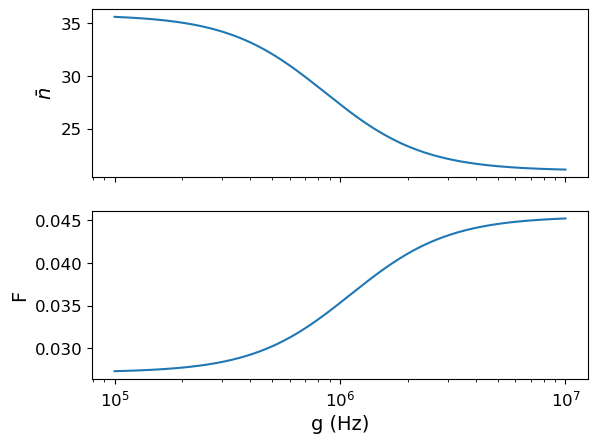

In [11]:
fig = plt.figure(1)
ax = fig.subplots(2, 1, sharex='all')

# Plot number of photons in cavity mode vs g
ax[0].semilogx(g, nbar_v_g)
ax[0].set_ylabel("$\\bar{n}$")

# Plot fidelity vs g
ax[1].semilogx(g, F_v_g)
ax[1].set_ylabel("F")
ax[1].set_xlabel("g (Hz)")

In [12]:
# From the paper, we know that r >> κ + γ and ~ g for best results.  Let's fix g to the experimental value
# and vary the others one at a time to see the impact
g = 2 * np.pi * 197.7e3
r_fixed = 2 * np.pi * 229e3
r = np.logspace(1, 8, 1000)
κ_fixed = 2 * np.pi * 185.1e3
κ = np.logspace(1, 8, 1000)
γ_fixed = 2 * np.pi * 140e3
γ = np.logspace(1, 8, 1000)

In [13]:
# Calculate the average number of photons in the cavity and the fidelity
nbar_v_r = full_mean_photons_cav(κ_fixed, ωc, γ_fixed, r, g, nT, nc, 0)
F_v_r = get_fidelity(nbar_v_r)

nbar_v_κ = full_mean_photons_cav(κ, ωc, γ_fixed, r_fixed, g, nT, nc, 0)
F_v_κ = get_fidelity(nbar_v_κ)

nbar_v_γ = full_mean_photons_cav(κ_fixed, ωc, γ, r_fixed, g, nT, nc, 0)
F_v_γ = get_fidelity(nbar_v_γ)

Text(0.5, 0, 'γ (Hz)')

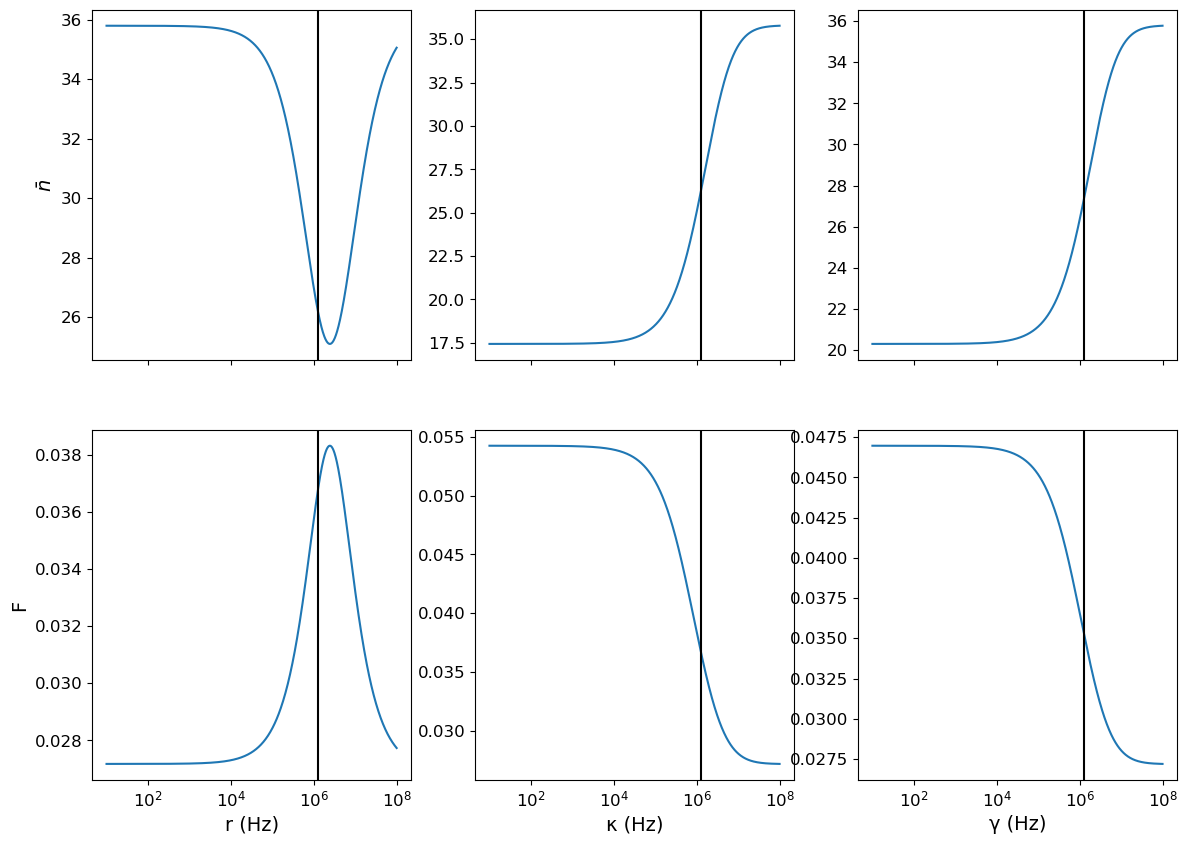

In [14]:
fig = plt.figure(1, figsize=(14, 10))
ax = fig.subplots(2, 3, sharex='col')

# Plot number of photons in cavity mode vs r
ax[0][0].semilogx(r, nbar_v_r)
ax[0][0].axvline(x=g, color='k')
ax[0][0].set_ylabel("$\\bar{n}$")

# Plot fidelity vs r
ax[1][0].semilogx(r, F_v_r)
ax[1][0].axvline(x=g, color='k')
ax[1][0].set_ylabel("F")
ax[1][0].set_xlabel("r (Hz)")

# Plot number of photons in cavity mode vs κ
ax[0][1].semilogx(κ, nbar_v_κ)
ax[0][1].axvline(x=g, color='k')

# Plot fidelity vs κ
ax[1][1].semilogx(κ, F_v_κ)
ax[1][1].axvline(x=g, color='k')
ax[1][1].set_xlabel("κ (Hz)")

# Plot number of photons in cavity mode vs γ
ax[0][2].semilogx(γ, nbar_v_γ)
ax[0][2].axvline(x=g, color='k')

# Plot fidelity vs κ
ax[1][2].semilogx(γ, F_v_γ)
ax[1][2].axvline(x=g, color='k')
ax[1][2].set_xlabel("γ (Hz)")

In [15]:
# Set κ and γ to a small as an ideal case calculation
κ = 0
γ = 1e3
r = 1e5
g = np.logspace(4, 7, 1000)
test_r = 0.5 * g

In [16]:
# Repeat calculations for g in a more ideal case than the experimental values
# Calculate the average number of photons in the cavity and the fidelity
nbar_v_g = full_mean_photons_cav(κ, ωc, γ, r, g, nT, nc, 0)
F_v_g = get_fidelity(nbar_v_g)

test_nbar_v_g = full_mean_photons_cav(κ, ωc, γ, test_r, g, nT, nc, 0)
test_F_v_g = get_fidelity(test_nbar_v_g)

Text(0.5, 0, 'g (Hz)')

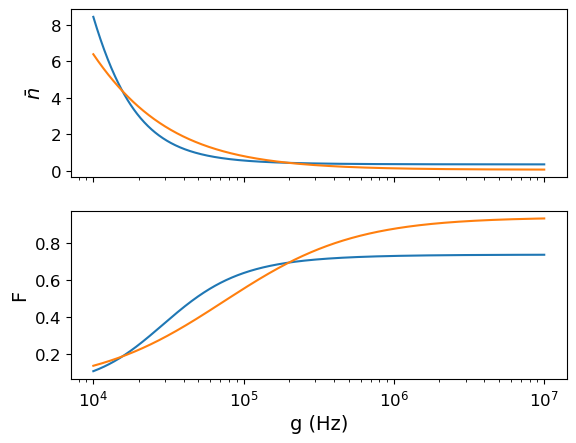

In [17]:
fig = plt.figure(1)
ax = fig.subplots(2, 1, sharex='all')

# Plot number of photons in cavity mode vs g
ax[0].semilogx(g, nbar_v_g)
ax[0].semilogx(g, test_nbar_v_g)
ax[0].set_ylabel("$\\bar{n}$")

# Plot fidelity vs g
ax[1].semilogx(g, F_v_g)
ax[1].semilogx(g, test_F_v_g)
ax[1].set_ylabel("F")
ax[1].set_xlabel("g (Hz)")

In [18]:
# Want to narrow down how close r should be to g for ideal cooling
gs = np.array([1e4, 1e5, 1e6, 1e7])
test_rs = np.linspace(0.1, 2.5, 1000)
nbars = np.zeros((gs.shape[0], test_rs.shape[0]))
for i in range(gs.shape[0]):
    nbars[i] = full_mean_photons_cav(κ, ωc, γ, test_rs * gs[i], gs[i], nT, nc, 0)

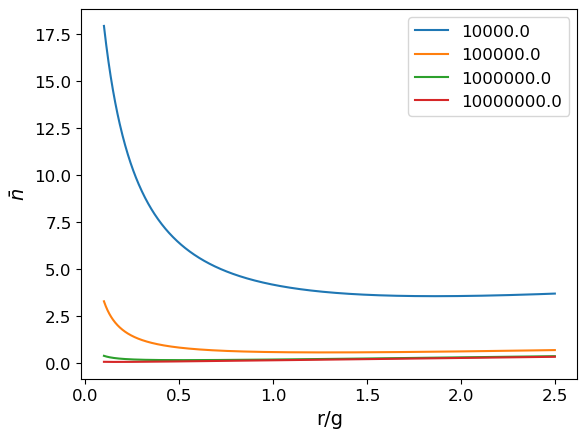

In [19]:
for i in range(gs.shape[0]):
    plt.plot(test_rs, nbars[i], label=str(gs[i]))

plt.xlabel("r/g")
plt.ylabel("$\\bar{n}$")
plt.legend()

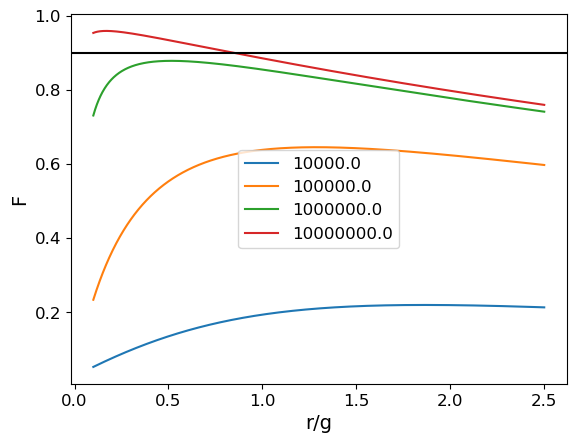

In [20]:
for i in range(gs.shape[0]):
    Fs = get_fidelity(nbars[i])
    plt.plot(test_rs, Fs, label=str(gs[i]))

plt.axhline(y=0.9, color='k')
plt.xlabel("r/g")
plt.ylabel("F")
plt.legend()

In [21]:
# Try lowering γ
γ = 1e2
gs = np.array([1e4, 1e5, 1e6, 1e7])
test_rs = np.linspace(0.1, 2.5, 1000)
nbars = np.zeros((gs.shape[0], test_rs.shape[0]))
for i in range(gs.shape[0]):
    nbars[i] = full_mean_photons_cav(κ, ωc, γ, test_rs * gs[i], gs[i], nT, nc, 0)

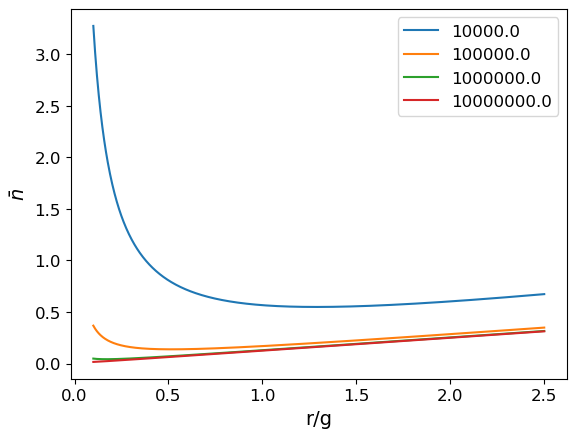

In [22]:
for i in range(gs.shape[0]):
    plt.plot(test_rs, nbars[i], label=str(gs[i]))

plt.xlabel("r/g")
plt.ylabel("$\\bar{n}$")
plt.legend()

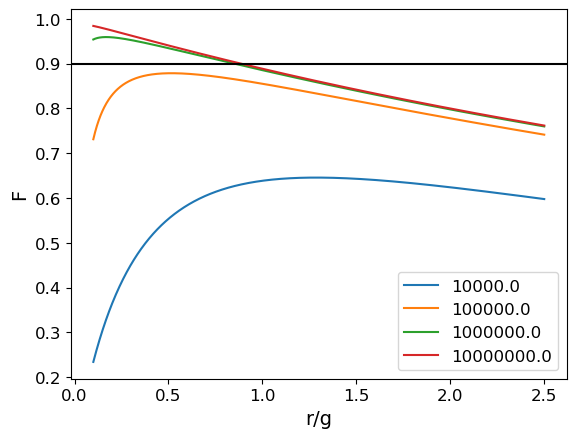

In [23]:
for i in range(gs.shape[0]):
    Fs = get_fidelity(nbars[i])
    plt.plot(test_rs, Fs, label=str(gs[i]))

plt.axhline(y=0.9, color='k')
plt.xlabel("r/g")
plt.ylabel("F")
plt.legend()

### b)

In [24]:
# Define values for g and Q and the r/g values we'll use
g_vals = np.array([1e5, 1e6, 1e7])
Q_vals = np.array([1e3, 1e4, 1e5, 1e6, 1e7])
r_g_rat = np.linspace(0, 5, 1000)

In [25]:
nbar_results = np.zeros((g_vals.shape[0], Q_vals.shape[0], r_g_rat.shape[0]))
for i in range(g_vals.shape[0]):
    for j in range(Q_vals.shape[0]):
        γj = ωc / Q_vals[j]
        for k in range(r_g_rat.shape[0]):
            nbar_results[i][j][k] = full_mean_photons_cav(κ, ωc, γj, r_g_rat[k] * g_vals[i], g_vals[i], nT, nc, 0)

Text(0.5, 0, 'r/g')

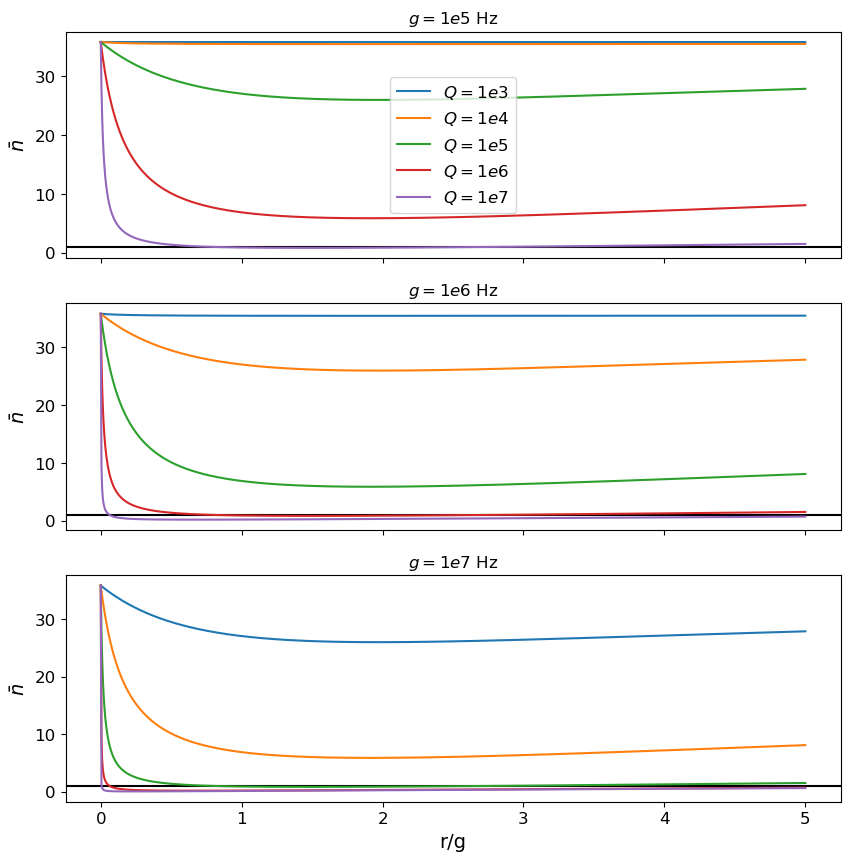

In [26]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.subplots(3, 1, sharex='all')
for i in range(g_vals.shape[0]):
    ax[i].set_title("$g = 1e" + str(i+5) + "$ Hz")
    ax[i].axhline(y=1, color='k')
    for j in range(Q_vals.shape[0]):
        ax[i].plot(r_g_rat, nbar_results[i][j], label='$Q=1e'+str(j+3)+'$')
        ax[i].set_ylabel("$\\bar{n}$")

ax[0].legend()
ax[2].set_xlabel("r/g")
#ax[2].set_ylim([0, 1])

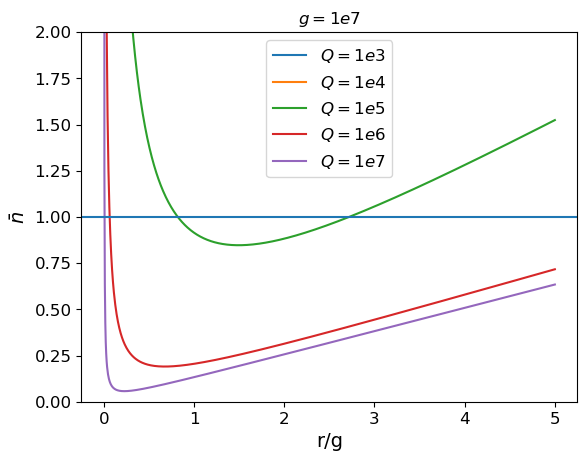

In [27]:
for i in range(Q_vals.shape[0]):
    plt.plot(r_g_rat, nbar_results[2][i], label="$Q=1e"+str(i+3)+"$")
plt.xlabel("r/g")
plt.ylabel("$\\bar{n}$")
plt.axhline(y=1)
plt.ylim([0, 2])
plt.title("$g = 1e7$")
plt.legend()

In [28]:
temp_from_photons(ωc, nc)

np.float64(0.06269368924438119)

Create a plot of number of photons in the cavity vs g and Q values

In [29]:
# first define the q and Q values we'll use
Q_vals = np.logspace(4, 7, 1000)
#g_vals = np.logspace(5, 7, 1000)
gs = 1
ρ = np.logspace(-4, -2, 1000)  # ppm
Vd = 1.7 # cm^3
N = ρ * 1e-6 * (3.53 * Vd / 12.01) * 6.022e23
g_vals = np.sqrt(N) * gs
print(g_vals.max())

# Now create storage array
nbar_vals = np.zeros((g_vals.shape[0], Q_vals.shape[0]))

# We also want to consider the optimum cooling, so we'll need to sweep over the ratio of r to g to find it
r_g_rat = np.linspace(1, 2, 100)

# Loop over
for i in range(g_vals.shape[0]):
    for j in range(Q_vals.shape[0]):
        min_val = np.inf
        min_ind = -1
        for k in range(r_g_rat.shape[0]):
            temp = full_mean_photons_cav(κ, ωc, ωc / Q_vals[j], r_g_rat[k] * g_vals[i], g_vals[i], nT, nc, 0)
            if temp < min_val:
                min_val = temp
                min_ind = k

        nbar_vals[i][j] = min_val

54854300.99866029


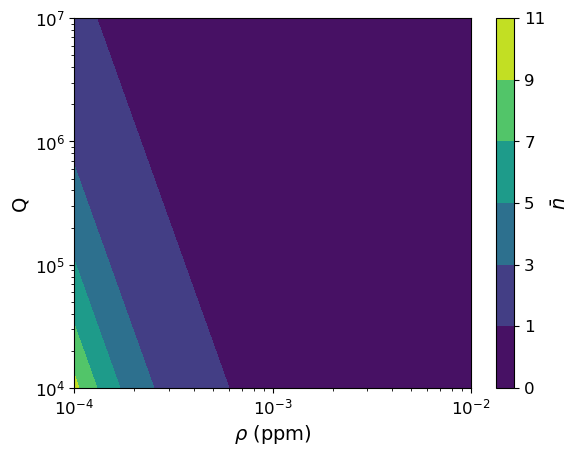

In [30]:
# Plot the image
plt.contourf(ρ, Q_vals, nbar_vals, [0, 1, 3, 5, 7, 9, 11])
plt.xlabel("$\\rho$ (ppm)")
plt.ylabel("Q")
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='$\\bar{n}$')
plt.savefig("nbar_vs_rhoQ.png", format='png', dpi=300)

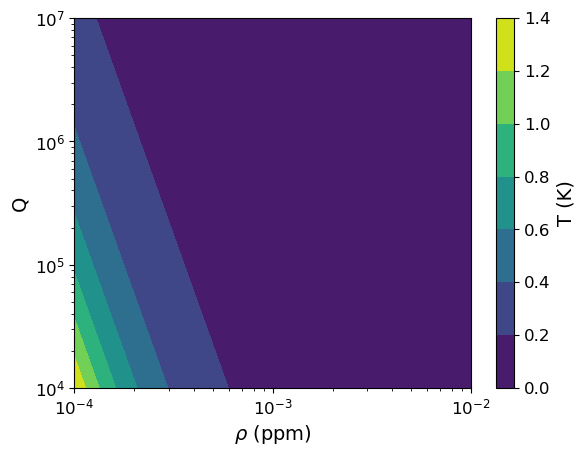

In [31]:
# Plot the image
plt.contourf(ρ, Q_vals, temp_from_photons(ωc, nbar_vals))#, [0, 1, 5, 10, 15, 20, 25, 30, 35, 40])
plt.xlabel("$\\rho$ (ppm)")
plt.ylabel("Q")
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='T (K)')
plt.savefig("t_vs_rhoQ.png", format='png', dpi=300)

In [32]:
print("Min calculated temperature: ", temp_from_photons(ωc, nbar_vals).min())
print("Spin bath temperature: ", temp_from_photons(ωc, nc))

Min calculated temperature:  0.06299059928040203
Spin bath temperature:  0.06269368924438119


So the minimum temperature for this is greater than the effective spin bath temperature

### Can our mode cooling approach further purify a state?
Assuming that we use a dilution refrigerator to start at a lower temperature, can we then use mode cooling to push the temperature lower?  Does it improve the fidelity with the ground state?

In [33]:
# Create arrays for the values we'll be checking
Ts = np.linspace(0.1, 5, 1000)
nTs = photons_from_temp(ωc, Ts)
Q = 1e5
g = 1e6

In [34]:
# Calculate the number of photons in the cavity mode at the specified temperatures
nbars = full_mean_photons_cav(κ, ωc, ωc / Q, 1.9 * g, g, nTs, nc, 0)

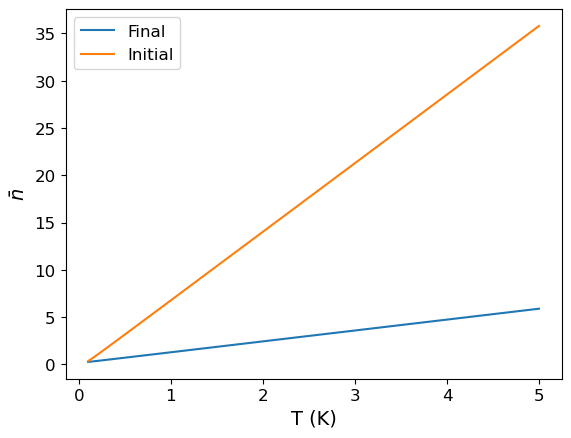

In [35]:
# Plot the cavity mode photons
plt.plot(Ts, nbars, label="Final")
plt.plot(Ts, nTs, label="Initial")
plt.xlabel("T (K)")
plt.ylabel("$\\bar{n}$")
plt.legend()

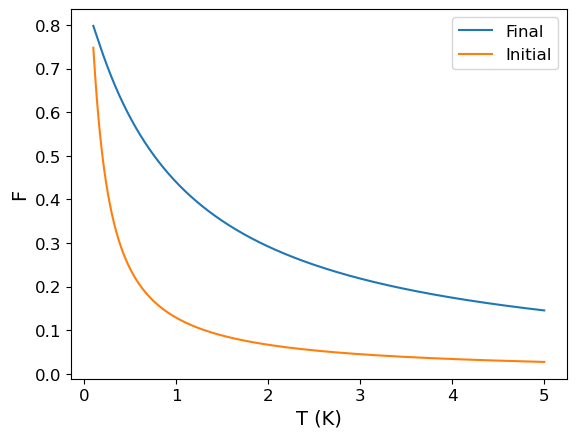

In [36]:
plt.plot(Ts, 1 / (1 + nbars), label="Final")
plt.plot(Ts, 1 / (1 + nTs), label="Initial")
plt.xlabel("T (K)")
plt.ylabel("F")
plt.legend()

### What kind of cooling can you get out of lower frequency modes?
Assume that the NV ensemble is coupled to a lower frequency cavity mode instead of the 3 GHz mode.  Does the cooling still operate the same way?  What are the limits in that case?

In [37]:
# Define the cavity frequency mode, the temperature, and other parameters
ωc = 2.87 * 2 * np.pi * 1e7
T = 5
nT = photons_from_temp(ωc, T)

In [38]:
# Define values for g and Q and the r/g values we'll use
g_vals = np.array([1e5, 1e6, 1e7])
Q_vals = np.array([1e3, 1e4, 1e5, 1e6, 1e7])
r_g_rat = np.linspace(0, 5, 1000)

In [39]:
nbar_results = np.zeros((g_vals.shape[0], Q_vals.shape[0], r_g_rat.shape[0]))
for i in range(g_vals.shape[0]):
    for j in range(Q_vals.shape[0]):
        γj = ωc / Q_vals[j]
        for k in range(r_g_rat.shape[0]):
            nbar_results[i][j][k] = full_mean_photons_cav(κ, ωc, γj, r_g_rat[k] * g_vals[i], g_vals[i], nT, nc, 0)

(0.0, 1.0)

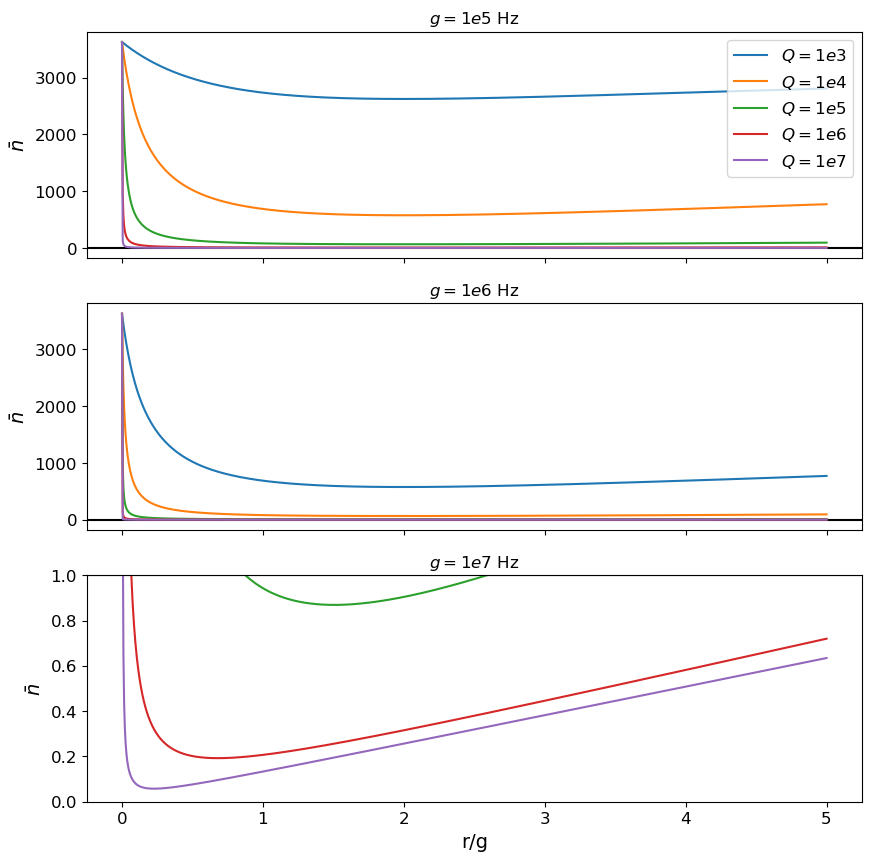

In [40]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.subplots(3, 1, sharex='all')
for i in range(g_vals.shape[0]):
    ax[i].set_title("$g = 1e" + str(i+5) + "$ Hz")
    ax[i].axhline(y=1, color='k')
    for j in range(Q_vals.shape[0]):
        ax[i].plot(r_g_rat, nbar_results[i][j], label='$Q=1e'+str(j+3)+'$')
        ax[i].set_ylabel("$\\bar{n}$")

ax[0].legend()
ax[2].set_xlabel("r/g")
ax[2].set_ylim([0, 1])

In [41]:
# first define the q and Q values we'll use
Q_vals = np.logspace(4, 7, 1000)
g_vals = np.logspace(5, 7, 1000)

# Now create storage array
nbar_vals = np.zeros((g_vals.shape[0], Q_vals.shape[0]))

# We also want to consider the optimum cooling, so we'll need to sweep over the ratio of r to g to find it
r_g_rat = np.linspace(0, 2, 100)
min_vals = []

# Loop over
for i in range(g_vals.shape[0]):
    for j in range(Q_vals.shape[0]):
        min_val = np.inf
        min_ind = -1
        for k in range(r_g_rat.shape[0]):
            temp = full_mean_photons_cav(κ, ωc, ωc / Q_vals[j], r_g_rat[k] * g_vals[i], g_vals[i], nT, nc, 0)
            if temp < min_val:
                min_val = temp
                min_ind = k
        min_vals.append(r_g_rat[min_ind])
        nbar_vals[i][j] = min_val

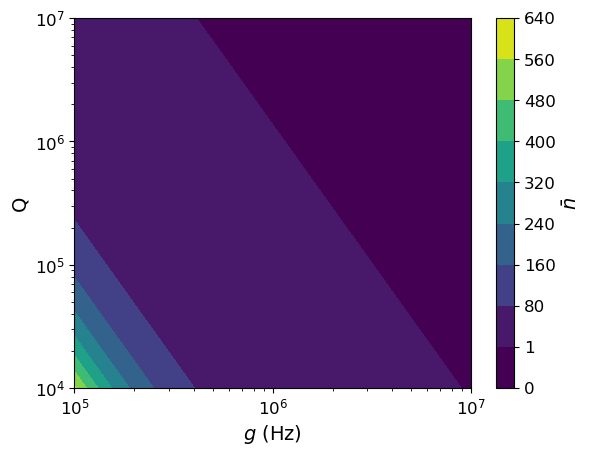

In [42]:
# Plot the image
plt.contourf(g_vals, Q_vals, nbar_vals, [0, 1, 80, 160, 240, 320, 400, 480, 560, 640])
plt.xlabel("$g$ (Hz)")
plt.ylabel("Q")
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='$\\bar{n}$')
plt.savefig("nbar_vs_gQ_ωc=300MHz.png", format='png', dpi=300)

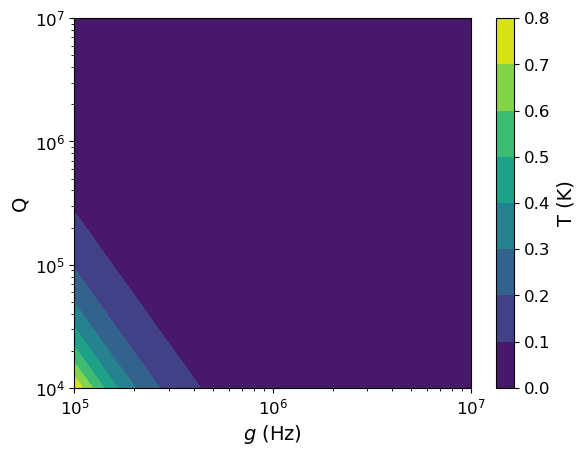

In [43]:
# Plot the image
plt.contourf(g_vals, Q_vals, temp_from_photons(ωc, nbar_vals))#, [0, 1, 5, 10, 15, 20, 25, 30, 35, 40])
plt.xlabel("$g$ (Hz)")
plt.ylabel("Q")
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='T (K)')
plt.savefig("t_vs_qQ_ωc=300MHz.png", format='png', dpi=300)

In [44]:
# Define the cavity frequency mode, the temperature, and other parameters
ωc = 2.87 * 2 * np.pi * 1e4
T = 5
nT = photons_from_temp(ωc, T)

In [45]:
# Define values for g and Q and the r/g values we'll use
g_vals = np.array([1e5, 1e6, 1e7])
Q_vals = np.array([1e0, 1e1, 1e2, 1e3, 1e4])
r_g_rat = np.linspace(0, 5, 1000)

In [46]:
nbar_results = np.zeros((g_vals.shape[0], Q_vals.shape[0], r_g_rat.shape[0]))
for i in range(g_vals.shape[0]):
    for j in range(Q_vals.shape[0]):
        γj = ωc / Q_vals[j]
        for k in range(r_g_rat.shape[0]):
            nbar_results[i][j][k] = full_mean_photons_cav(κ, ωc, γj, r_g_rat[k] * g_vals[i], g_vals[i], nT, nc, 0)

Text(0.5, 0, 'r/g')

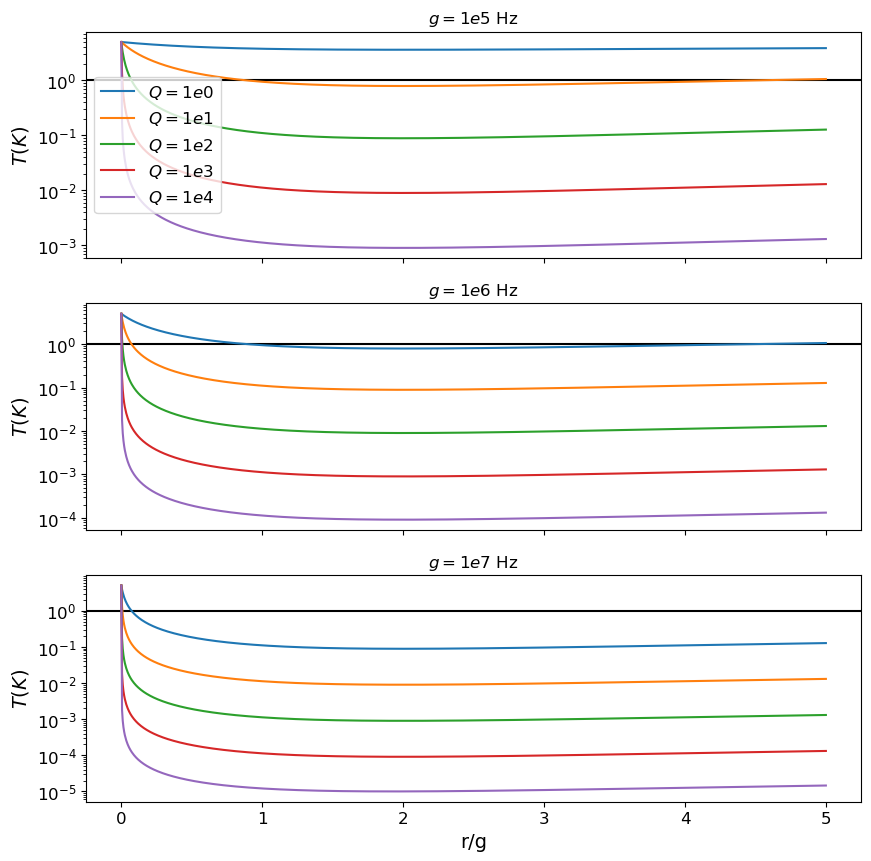

In [47]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.subplots(3, 1, sharex='all')
for i in range(g_vals.shape[0]):
    ax[i].set_title("$g = 1e" + str(i+5) + "$ Hz")
    ax[i].axhline(y=1, color='k')
    for j in range(Q_vals.shape[0]):
        ax[i].semilogy(r_g_rat, temp_from_photons(ωc, nbar_results[i][j]), label='$Q=1e'+str(j)+'$')
        ax[i].set_ylabel("$T (K)$")

ax[0].legend()
ax[2].set_xlabel("r/g")
#ax[2].set_ylim([0, 1])

In [48]:
# first define the q and Q values we'll use
Q_vals = np.logspace(1, 3, 1000)
g_vals = np.logspace(5, 7, 1000)

# Now create storage array
nbar_vals = np.zeros((g_vals.shape[0], Q_vals.shape[0]))

# We also want to consider the optimum cooling, so we'll need to sweep over the ratio of r to g to find it
r_g_rat = np.linspace(0, 2, 100)
min_vals = []

# Loop over
for i in range(g_vals.shape[0]):
    for j in range(Q_vals.shape[0]):
        min_val = np.inf
        min_ind = -1
        for k in range(r_g_rat.shape[0]):
            temp = full_mean_photons_cav(κ, ωc, ωc / Q_vals[j], r_g_rat[k] * g_vals[i], g_vals[i], nT, nc, 0)
            if temp < min_val:
                min_val = temp
                min_ind = k
        min_vals.append(r_g_rat[min_ind])
        nbar_vals[i][j] = min_val

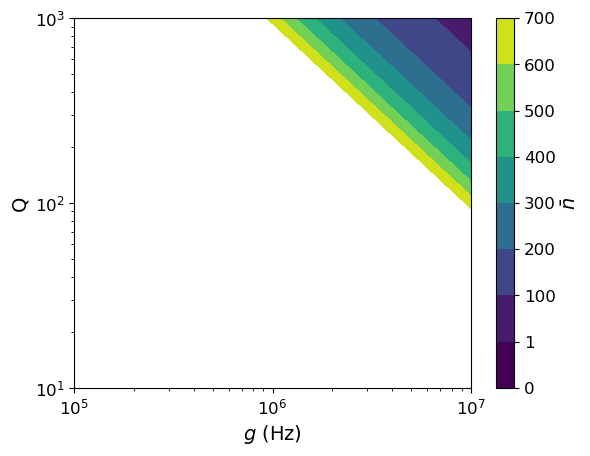

In [49]:
# Plot the image
plt.contourf(g_vals, Q_vals, nbar_vals, [0, 1, 100, 200, 300, 400, 500, 600, 700])
plt.xlabel("$g$ (Hz)")
plt.ylabel("Q")
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='$\\bar{n}$')
plt.savefig("nbar_vs_gQ_ωc=30KHz.png", format='png', dpi=300)

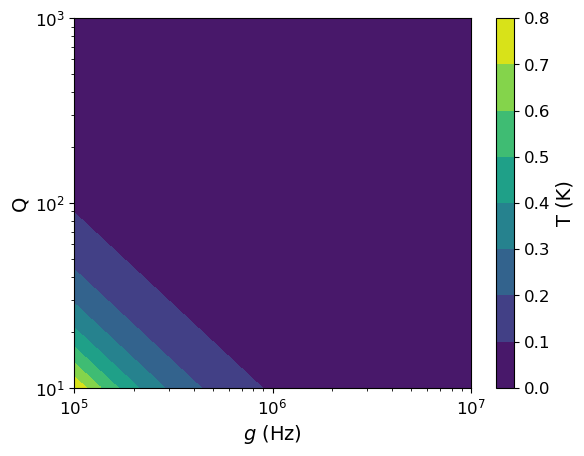

In [50]:
# Plot the image
plt.contourf(g_vals, Q_vals, temp_from_photons(ωc, nbar_vals))#, [0, 1, 5, 10, 15, 20, 25, 30, 35, 40])
plt.xlabel("$g$ (Hz)")
plt.ylabel("Q")
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='T (K)')
plt.savefig("t_vs_qQ_ωc=30KHz.png", format='png', dpi=300)

In [51]:
# Okay, this seems like γ = ωc / Q is getting very small, which is why the temperature is so low here.  What if it doesn't?
# Define values for g and Q and the r/g values we'll use
g_vals = np.array([1e5, 1e6, 1e7])
γ_vals = np.array([1e2, 1e1, 1e0, 1e-1, 1e-2])
r_g_rat = np.linspace(0, 5, 1000)

In [52]:
nbar_results = np.zeros((g_vals.shape[0], γ_vals.shape[0], r_g_rat.shape[0]))
for i in range(g_vals.shape[0]):
    for j in range(γ_vals.shape[0]):
        #γj = ωc / Q_vals[j]
        for k in range(r_g_rat.shape[0]):
            nbar_results[i][j][k] = full_mean_photons_cav(κ, ωc, γ_vals[j], r_g_rat[k] * g_vals[i], g_vals[i], nT, nc, 0)

Text(0.5, 0, 'r/g')

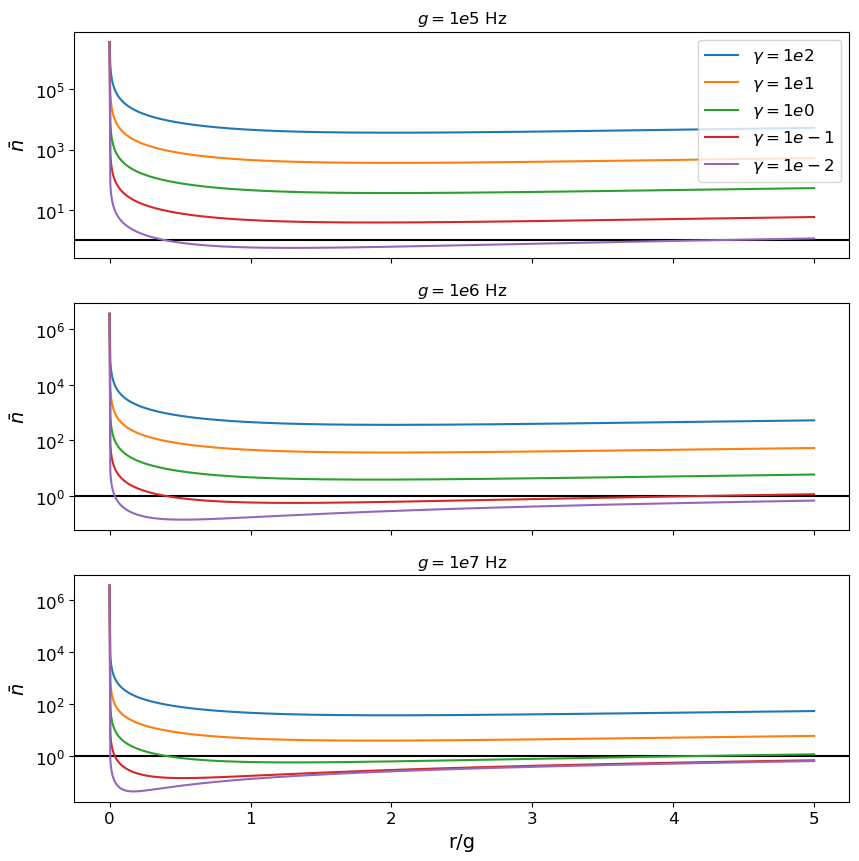

In [53]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.subplots(3, 1, sharex='all')
for i in range(g_vals.shape[0]):
    ax[i].set_title("$g = 1e" + str(i+5) + "$ Hz")
    ax[i].axhline(y=1, color='k')
    for j in range(γ_vals.shape[0]):
        ax[i].semilogy(r_g_rat, nbar_results[i][j], label='$\\gamma=1e'+str(2-j)+'$')
        ax[i].set_ylabel("$\\bar{n}$")

ax[0].legend()
ax[2].set_xlabel("r/g")
#ax[2].set_ylim([0, 1])

### Is the cooling bounded by the effective spin bath temperature determined by polarization?
Let Q be very large and suppose that there isn't a limit on g for the sake of checking.

In [54]:
# Define parameters
ωc = 2.87 * 2 * np.pi * 1e9
T = 5
nT = photons_from_temp(ωc, T)
Q = 1e7
g = np.logspace(6, 10, 1000)

In [55]:
nbar = full_mean_photons_cav(κ, ωc, ωc / Q, 0.5*g, g, nT, nc, 0)

Text(0, 0.5, 'T (K)')

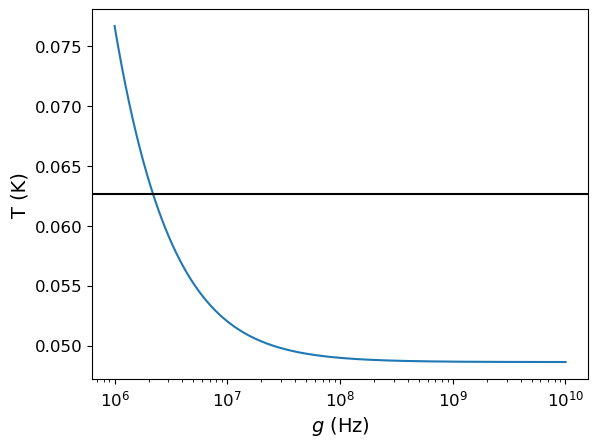

In [56]:
plt.semilogx(g, temp_from_photons(ωc, nbar))
plt.axhline(y=temp_from_photons(ωc, nc), color='k')
plt.xlabel("$g$ (Hz)")
plt.ylabel("T (K)")

Try plotting the number of photons in the cavity mode against the excited state population of the spin ensemble.

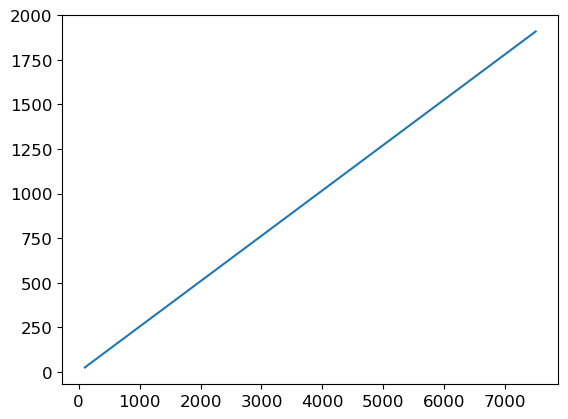

In [142]:
power = np.linspace(0.1, 7.5, 1000) * 1e3 # mW
spot_size = np.pi * (5 / 2) ** 2 / (1e-3 * 1e-3) # um^2
intensity = power / spot_size # mW / um^2
s = intensity / 1
Γp = 5e6 * (s / (1 + s))  # s^-1
plt.plot(power, Γp)

In [158]:
power = 1e3 # mW
spot_size = np.pi * (5 / 2) ** 2 / (1e-3 * 1e-3) # um^2
intensity = power / spot_size # mW / um^2
s = intensity / 1
Γp = 5e6 * (s / (1 + s))  # s^-1
print(Γp)

254.6349404960041


In [162]:
T = np.linspace(0.5, 300, 10000)
Γ1 = 0.06 + 2.81e3 / (np.exp(73e-3 / (8.617e-5 * T)) - 1) + 2.2e-11 * T ** 5
P1 = Γ1 / (2 * Γ1 + Γp)
P0 = 1 - P1
P = np.abs(P0 - P1)
ncs = 0.5 * (1 - P) / P 
nTs = photons_from_temp(ωc, T)
print(ncs.shape[0], nTs.shape[0])
nbars = full_mean_photons_cav(κ, ωc, ωc / 1e5, 2*1e7, 1e7, nTs, ncs, 0)

10000 10000


/tmp/ipykernel_21261/2681951135.py:2: RuntimeWarning: overflow encountered in exp
  Γ1 = 0.06 + 2.81e3 / (np.exp(73e-3 / (8.617e-5 * T)) - 1) + 2.2e-11 * T ** 5


Text(0, 0.5, '$\\bar{n}$')

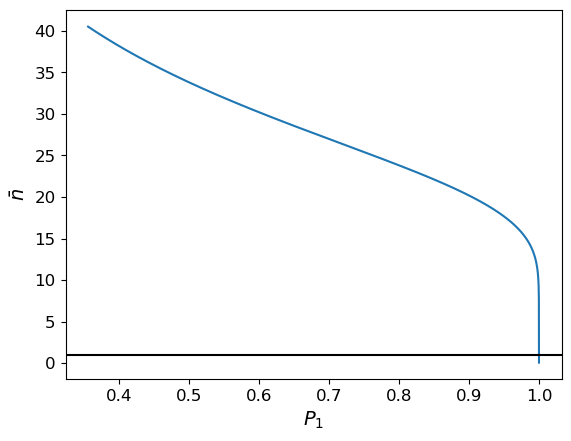

In [165]:
plt.plot(P, nbars)
plt.axhline(y=1, color='k')
plt.xlabel("$P_1$")
plt.ylabel("$\\bar{n}$")

In [154]:
T = np.array([300, 350, 400])
Γ1s = 0.06 + 2.1e3 / (np.exp(73e-3 / (8.617e-5 * T)) - 1) + 2.2e-11 * T ** 5

In [155]:
intensities = np.logspace(-4, 2, 1000) # μW / μm^2
I_sat = 1000 # μW / μm^2
s = intensities / I_sat
Γp = 5e6 * (s / (1 + s))
P1s = np.zeros((3, 1000))
P0s = np.zeros((3, 1000))
for i in range(T.shape[0]):
    P1s[i] = Γ1s[i] / (2 * Γ1s[i] + Γp)
    P0s[i] = 1 - P1s[i]

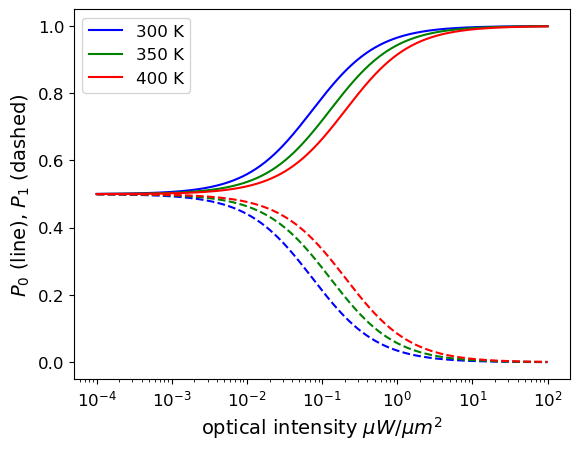

In [156]:
colors = ['b', 'g', 'r']
labels = ['300 K', '350 K', '400 K']
for i in range(T.shape[0]):
    plt.semilogx(intensities, P1s[i], color=colors[i], linestyle='--')
    plt.semilogx(intensities, P0s[i], color=colors[i], label=labels[i])

plt.xlabel("optical intensity $\\mu W / \\mu m^2$")
plt.ylabel("$P_0$ (line), $P_1$ (dashed)")
plt.legend()